The core theme of this class is that the use of advanced, non-linear data structures allow us to accomplish more sophisticated data tasks, and use computational methods to understand and manipulate real world systems. To navigate these more complex data structures we have relied on a computational motif that we're calling 'pointer chasing'. Pointer chasing enables the efficient, systematic processing of nodes or vertices. Let's review pointer chasing in all the data structures we've introduced so far, and implement some new instances of pointer chasing.

In [1]:
# Lets start with linked lists.
## Implement a Node Class

class Node:
  def __init__(self, val):
    self.data = val
    self.next = None

Instead of implementing a full linked list class, lets isolate the pointer chasing by defining a function called traverse.

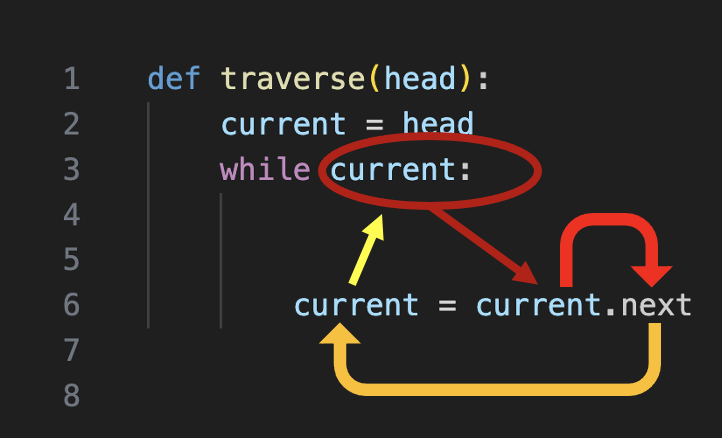

In [3]:
## Let's make a version of that function called search that will stop when it finds the node that its looking for.

def search(head, target):
  current = head
  while current:
    if current.data == target:
      return current
    current = current.next
  return None

Now that we've created search, lets modify this to create a function that will delete a node.  What are the two functional abilities we need to add?

* We need to delete the node we find
* We need to make the previous node point to the next node so that the list continues to work

In [5]:
def delete(head, target):
  current = head
  while current and current.next != target:
    current = current.next

  if current.next == target:
    current.next = current.next.next    # the node before the target, it's next will now point to node after target
    #del current.next     # we would need to do this if memory was critical but put this above or it'll delete current.next.next




Here's the full implementation of linked list - can you see the pointer chasing? Please remember to review tinyurl.com/LinkedList507 to see the efficiency issues

In [6]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def insert_at_end(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node

    def insert_at_beginning(self, data):
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node

    def delete_node(self, key):
        temp = self.head
        if temp and temp.data == key:
            self.head = temp.next
            temp = None
            return
        prev = None
        while temp and temp.data != key:
            prev = temp
            temp = temp.next
        if temp is None:
            return
        prev.next = temp.next
        temp = None

    def search(self, key):
        current = self.head
        while current:
            if current.data == key:
                return True
            current = current.next
        return False

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=' -> ')
            current = current.next
        print('None')


ll = LinkedList()
ll.insert_at_end(1)
ll.insert_at_end(2)
ll.insert_at_end(3)
ll.insert_at_beginning(0)
ll.print_list()  # Output: 0 -> 1 -> 2 -> 3 -> None
print(ll.search(2))  # Output: True
ll.delete_node(2)
ll.print_list()  # Output: 0 -> 1 -> 3 -> None


0 -> 1 -> 2 -> 3 -> None
True
0 -> 1 -> 3 -> None


Ok now lets look at it again in the context of a Binary Search Tree

In [ ]:
## Lets implement a TreeNode
# Rearrange these lines and fill in the blanks to create a TreeNode class:

self.____ = None #right child reference
self.data = data
def __init__(self, ____):
class TreeNode:
self._____ = None  # Left child reference

In [7]:
class TreeNode:
  def __init__(self, val):
    self.data = val
    self.left = None
    self.right = None

#### can we write a function to search for Nodes in BSTs starting at the root?

In [ ]:
def BSTsearch(___, ___):  ### this is slightly different than the search method in a BST class because now we have to provide the root instead of being able to access via self.root, how does that change the necessary code?

In [8]:
  def BSTsearch(root, target):
    if root.data == target:
      return root

    current = root
    if target < current.data:
      return BSTsearch(current.left, target)
    ### when target > root.data
    return BSTsearch(current.right, target)






Ok Lets advance now to using pointer chasing in the context of graphs. This is obviously the most complicated because graphs can have cycles and graphs can have any number of edges off a given node

#Depth-First Search (DFS) in Python

* Stack-based implementation

Use a list as a stack (stack = [])

Push with stack.append(node)

Pop with stack.pop()


* Recursive implementation

Simpler code, implicit stack via function call stack


## Pointer chasing pattern

Start at root node

Push node onto stack

Pop node, process it

Get all neighbors (following pointers)

Push unvisited neighbors onto stack

Repeat until stack is empty






In [9]:
def dfs_iterative(graph, start):
    visited = set()
    stack = [start]
    while stack:
        # Pointer chase - get current node
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            # Process node
            print(node)
            # Follow pointers to neighbors
            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)

# Breadth-First Search (BFS) in Python

## Queue-based implementation

Use collections.deque as an efficient queue

Enqueue with queue.append(node)

Dequeue with queue.popleft()


##  Pointer chasing pattern

Start at root node

Enqueue node into queue

Dequeue node, process it

Get all neighbors (following pointers)

Enqueue unvisited neighbors

Repeat until queue is empty

In [10]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    while queue:
        # Pointer chase - get current node
        node = queue.popleft()
        # Process node
        print(node)
        # Follow pointers to neighbors
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

The key difference in pointer chasing:

*  DFS uses a stack (LIFO) which means it follows one pointer path to its deepest point before backtracking
*  BFS uses a queue (FIFO) which means it explores all pointers at the current level before moving to the next level

